# Overview
Predict the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations

## Load Libraries
Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data
Load the data into Pandas dataframes. Describe the training data.

In [2]:
#Read training data
X = pd.read_csv("train4.csv", index_col='key')

#Test data
X_test = pd.read_csv("test.csv", index_col='key')

In [4]:
X.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
key,,,,,,,
26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1


In [5]:
X.shape

(9914, 7)

In [59]:
X.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-72.453558,39.913186,-72.461136,39.885780,1.645552
std,10.654715,7.350194,10.624606,6.366846,1.272293
min,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,-73.992056,40.734516,-73.991112,40.735169,1.000000
50%,-73.981768,40.752633,-73.980107,40.753685,1.000000
75%,-73.966961,40.767696,-73.963634,40.768164,2.000000
max,40.766125,401.083332,40.802437,41.366138,6.000000


In [58]:
X.nunique()

pickup_longitude     8911
pickup_latitude      9133
dropoff_longitude    8950
dropoff_latitude     9135
passenger_count         7
dtype: int64

In [8]:
# Clean the training data set.
X.dropna(axis=0, subset=['fare_amount'], inplace=True)
y = X.fare_amount
X.drop(['fare_amount'], axis=1, inplace=True)
X.drop(['pickup_datetime'], axis=1, inplace=True)

## Split Data
Split data between training data and validation data.

In [10]:
#Split training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

## Create imputer
Remove null values by incorporating an imputer based on averages.

In [11]:
# Establish Imputer
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Do not distrupt original data
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

## Score Model
Use mean absolute error, mean squared error, coefficient of determination, and cross validation to define the accuracy in predicting New York taxi fares with a random forest regressor.

In [12]:
# Function for comparing different approaches in finding model accuracy
def get_score(X_train, X_valid, y_train, y_valid, n_estimators, n_metric):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return n_metric(y_valid, preds)

## Mean Absolute Error
Calculate the mean absolute error of each taxi fare prediction.

In [13]:
results_mae = {}
for i in range(1, 9):
    results_mae[50*i] = get_score(imputed_X_train, imputed_X_valid, y_train, y_valid, 50*i, mean_absolute_error)
print("mean absolute error: ", results_mae)

mean absolute error:  {50: 2.42311205604401, 100: 2.4111230937790924, 150: 2.3997982968901947, 200: 2.398506318387867, 250: 2.39601141597865, 300: 2.3919653130410086, 350: 2.39361095121008, 400: 2.3942390407507044}


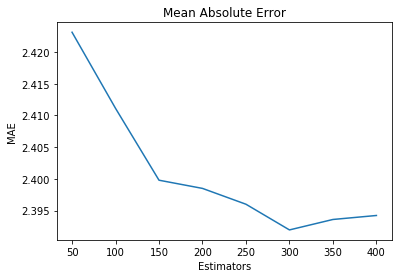

In [14]:
plt.plot(list(results_mae.keys()), list(results_mae.values()))
plt.xlabel('Estimators')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.show()

In [15]:
print("Best number of estimators: ", min(results_mae, key = results_mae.get))
print("Mean Absolute Error: ", results_mae[min(results_mae, key = results_mae.get)])

Best number of estimators:  300
Mean Absolute Error:  2.3919653130410086


## Mean Squared Error
Calculate the mean squared error of the model predictions with a Random Forest Regressor. Average the square of the errors

In [16]:
results_mse = {}
for i in range(1, 9):
    results_mse[50*i] = get_score(imputed_X_train, imputed_X_valid, y_train, y_valid, 50*i, mean_squared_error)
print("accuracy: ", results_mse)

accuracy:  {50: 21.878498012164783, 100: 21.88230349265441, 150: 21.416512868149624, 200: 21.306364744115935, 250: 21.291875094077835, 300: 21.066480491215756, 350: 21.105234480202462, 400: 21.11752529341994}


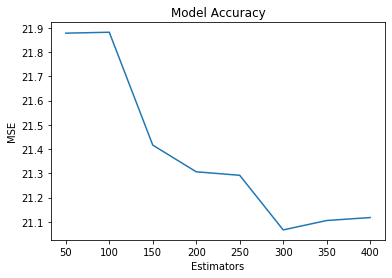

In [17]:
plt.plot(list(results_mse.keys()), list(results_mse.values()))
plt.xlabel('Estimators')
plt.ylabel('MSE')
plt.title('Model Accuracy')
plt.show()

In [18]:
print("Best number of estimators: ", min(results_mse, key = results_mse.get))
print("Accuracy: ", results_mse[min(results_mse, key = results_mse.get)])

Best number of estimators:  300
Accuracy:  21.066480491215756


## R^2: coefficient of determination
Measure the strength of the relationship between your the random forest regressor model and the taxi fare amounts.

In [19]:
results_r2 = {}
for i in range(1, 9):
    results_r2[50*i] = get_score(imputed_X_train, imputed_X_valid, y_train, y_valid, 50*i, r2_score)
print("accuracy: ", results_r2)

accuracy:  {50: 0.737730126892592, 100: 0.7376845084555048, 150: 0.7432682029081846, 200: 0.7445886104835708, 250: 0.7447623060761455, 300: 0.7474642380761787, 350: 0.7469996721919805, 400: 0.746852335294304}


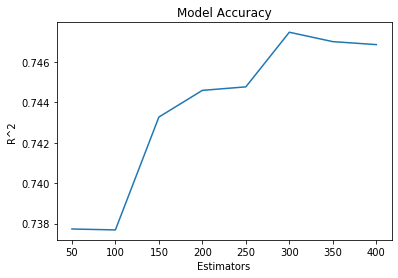

In [20]:
plt.plot(list(results_r2.keys()), list(results_r2.values()))
plt.xlabel('Estimators')
plt.ylabel('R^2')
plt.title('Model Accuracy')
plt.show()

In [21]:
print("Best number of estimators: ", max(results_r2, key = results_r2.get))
print("Accuracy: ", results_r2[max(results_r2, key = results_r2.get)])

Best number of estimators:  300
Accuracy:  0.7474642380761787


## Cross Validation Test
Get the Cross Validation Score of the model using a different number of folds each time to break up the data. Use 150 estimators because the graphs above determined the number returned the most accurate results.

In [22]:
def score_cross_val(n_folds):
    model = RandomForestRegressor(n_estimators=150, random_state=0)
    cross = -1 * cross_val_score(model, imputed_X_train, y_train, cv=n_folds, scoring="neg_mean_absolute_error").mean()
    return cross

#print(cross)

In [23]:
results_cross = {}
for i in range(2, 9):
    results_cross[i] = score_cross_val(i)
print("Cross Validation Score: ", results_cross)

Cross Validation Score:  {2: 2.492414668130814, 3: 2.492288737211973, 4: 2.4552274270681793, 5: 2.458711902679993, 6: 2.457546173664176, 7: 2.4593385382967723, 8: 2.4454350528669666}


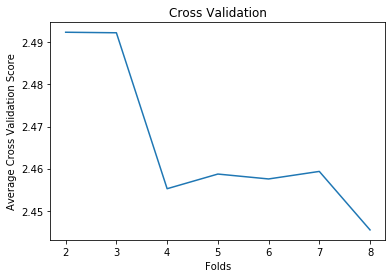

In [24]:
plt.plot(list(results_cross.keys()), list(results_cross.values()))
plt.xlabel('Folds')
plt.ylabel('Average Cross Validation Score')
plt.title('Cross Validation')
plt.show()

In [25]:
print("Best number of folds: ", min(results_cross, key = results_cross.get))
print("Mean Absolute eror: ", results_cross[min(results_cross, key = results_cross.get)])

Best number of folds:  8
Mean Absolute eror:  2.4454350528669666


## Test Data

In [56]:
#preprocess test data
X_test, X_valid_test, y_train_test, y_valid_test = train_test_split(X, y, random_state = 0)
imputed_X_valid_test = pd.DataFrame(my_imputer.transform(X_valid_test))
imputed_X_valid_test.columns = X_test.columns

In [37]:
output = pd.DataFrame({'key': X_valid_test.index,
                       'fare': preds_test.round(2)})
print(output)
output.to_csv('submission.csv', index=False)

          key   fare
0     58:00.0   9.56
1     25:00.0  20.34
2     35:00.0   8.00
3     10:46.0  11.26
4     54:56.0  22.71
...       ...    ...
2474  12:21.0   5.94
2475  19:00.0  12.03
2476  43:00.0   5.60
2477  42:00.0  15.61
2478  37:00.0   5.28

[2479 rows x 2 columns]


## Score Test Data
Use the mean absolute error, mean squared error, and coefficient of determination to find the accuracy of the random forest regressor in predict new york taxi fare amounts.

In [38]:
def get_score_test(X_valid, y_train, y_valid, n_estimators, n_metric):
    model = RandomForestRegressor(n_estimators = n_estimators, random_state = 1)
    model.fit(imputed_X_train, y_train)
    preds_test = model.predict(imputed_X_valid_test)
    return n_metric(y_valid, preds_test)

In [57]:
results_mae_test = {}

for i in range(1, 9):
    results_mae_test[50*i] = get_score_test(imputed_X_valid_test, y_train, y_valid, 50*i, mean_absolute_error)
print("mean absolute error: ", results_mae_test)

mean absolute error:  {50: 2.4323775851484575, 100: 2.415297841991548, 150: 2.406934332081905, 200: 2.4012454185414467, 250: 2.3948802916879277, 300: 2.394672908359615, 350: 2.392729144491434, 400: 2.3929570547082766}


In [44]:
results_mse_test = {}

for i in range(1, 9):
    results_mse_test[50*i] = get_score_test(imputed_X_valid_test, y_train, y_valid, 50*i, mean_squared_error)
print("mean absolute error: ", results_mse_test)

mean absolute error:  {50: 21.497495795389046, 100: 21.455857980553372, 150: 21.132945008934943, 200: 21.122018010878556, 250: 20.99081446095308, 300: 21.033376240632975, 350: 21.002202123156383, 400: 21.01463951824932}


In [46]:
results_r2_test = {}

for i in range(1, 9):
    results_r2_test[50*i] = get_score_test(imputed_X_valid_test, y_train, y_valid, 50*i, r2_score)
print("mean absolute error: ", results_r2_test)

mean absolute error:  {50: 0.7422974149665654, 100: 0.7427965508947882, 150: 0.7466674904832377, 200: 0.7467984785607602, 250: 0.7483712893803632, 300: 0.7478610773653673, 350: 0.748234779062361, 400: 0.7480856850052189}


In [47]:
print("Best number of estimators: ", min(results_mae_test, key = results_mae_test.get))
print("Mean Absolute Error: ", results_mae_test[min(results_mae_test, key = results_mae_test.get)])

Best number of estimators:  350
Mean Absolute Error:  2.392729144491434


In [48]:
print("Best number of estimators: ", min(results_mse_test, key = results_mse_test.get))
print("Mean Squared Error: ", results_mse_test[min(results_mse_test, key = results_mse_test.get)])

Best number of estimators:  250
Mean Squared Error:  20.99081446095308


In [49]:
print("Best number of estimators: ", min(results_r2_test, key = results_r2_test.get))
print("R^2: ", results_r2_test[min(results_r2_test, key = results_r2_test.get)])

Best number of estimators:  50
R^2:  0.7422974149665654


## Compare Training and Test Data
Compare the accuracy based on training data versus test data

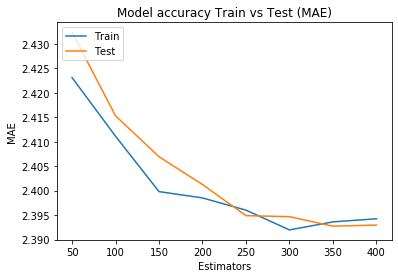

In [53]:
x_cords = list(results_mae_test.keys())
y1_cords = list(results_mae.values())
y2_cords = list(results_mae_test.values())
plt.plot(x_cords, y1_cords)
plt.plot(x_cords, y2_cords)
plt.title('Model accuracy Train vs Test (MAE)')
plt.ylabel('MAE')
plt.xlabel('Estimators')
plt.legend(['Train', 'Test'], loc='upper left')

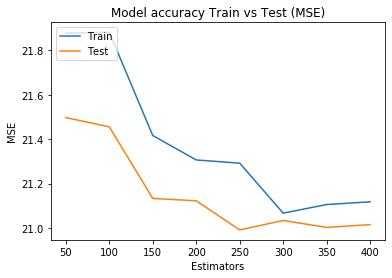

In [54]:
x_cords = list(results_mse_test.keys())
y1_cords = list(results_mse.values())
y2_cords = list(results_mse_test.values())
plt.plot(x_cords, y1_cords)
plt.plot(x_cords, y2_cords)
plt.title('Model accuracy Train vs Test (MSE)')
plt.ylabel('MSE')
plt.xlabel('Estimators')
plt.legend(['Train', 'Test'], loc='upper left')

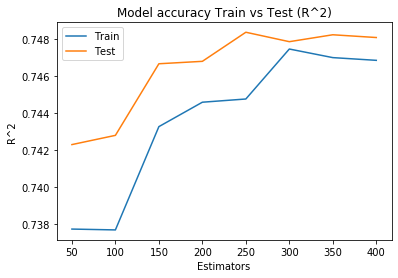

In [55]:
x_cords = list(results_r2_test.keys())
y1_cords = list(results_r2.values())
y2_cords = list(results_r2_test.values())
plt.plot(x_cords, y1_cords)
plt.plot(x_cords, y2_cords)
plt.title('Model accuracy Train vs Test (R^2)')
plt.ylabel('R^2')
plt.xlabel('Estimators')
plt.legend(['Train', 'Test'], loc='upper left')